## **Hotel Booking Cancellation Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore Python Warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
df_train = pd.read_csv(r"E:\Data Science Portfolio\Hotel-Booking-Cancellation-Prediction-MLOps\artifacts\raw\train.csv", index_col = 0)

df = df_train.copy()

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [3]:
# Information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date    

In [4]:
# Shape of data
df.shape

(29020, 19)

In [5]:
# Drop Unnecessary Columns

df.drop(columns='Booking_ID', inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
25629,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
14473,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
23720,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
5843,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
18709,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
# Separate Columns into Numerical and Categorical Columns

numerical_columns = [col for col in df if df[col].dtypes != 'O']

categorical_columns = [col for col in df if df[col].dtypes == 'O']

In [9]:
df[numerical_columns].dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [10]:
df[categorical_columns].dtypes

type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
booking_status         object
dtype: object

In [11]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
25629,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
14473,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
23720,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
5843,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
18709,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [12]:
# Statistical Description of data

df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,1.844280,0.106306,0.807822,2.202068,0.031943,85.376085,2017.820434,7.416506,15.598725,0.025775,0.023880,0.154721,103.501785,0.619917
std,0.518692,0.405391,0.868111,1.402801,0.175853,85.859070,0.383832,3.060058,8.740151,0.158467,0.375994,1.777787,35.137794,0.786348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.850000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.120000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


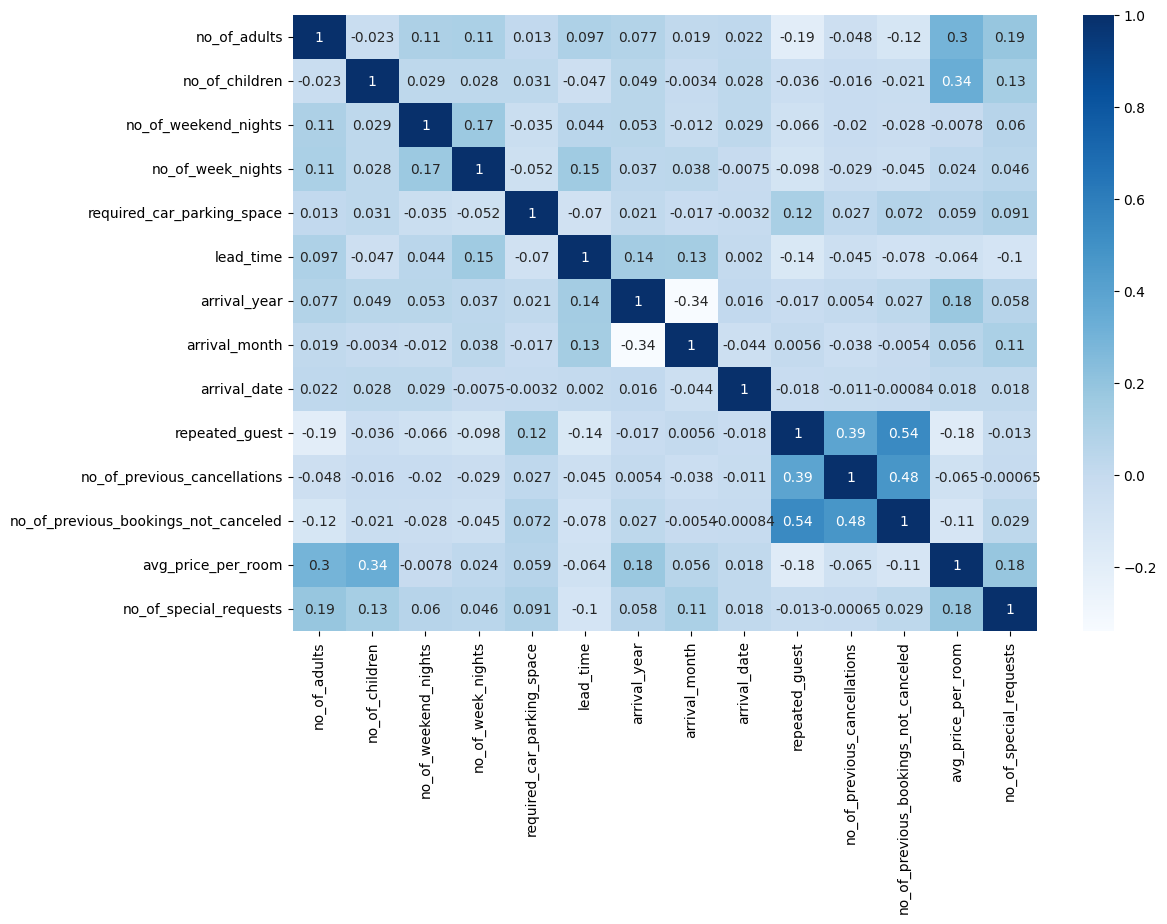

In [13]:
# Correlation

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='Blues')
plt.show()

In [14]:
# Value counts for all the numerical columns

for col in numerical_columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'no_of_adults':
no_of_adults
2    20896
1     6154
3     1841
0      116
4       13
Name: count, dtype: int64

Value counts for 'no_of_children':
no_of_children
0     26837
1      1315
2       853
3        12
9         2
10        1
Name: count, dtype: int64

Value counts for 'no_of_weekend_nights':
no_of_weekend_nights
0    13537
1     7981
2     7238
3      126
4       96
5       28
6       14
Name: count, dtype: int64

Value counts for 'no_of_week_nights':
no_of_week_nights
2     9110
1     7627
3     6277
4     2396
0     1904
5     1314
6      147
7       88
10      49
8       43
9       27
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

Value counts for 'required_car_parking_space':
required_car_parking_space
0    28093
1      927
Name: count, dtype: int64

Value counts for 'lead_time':
lead_time
0      1058
1       844
2       537
3       498
4       492
       ... 
328       1
345       1
311       1
355 

In [15]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    19551
Canceled         9469
Name: count, dtype: int64

- Our data is imbalanced

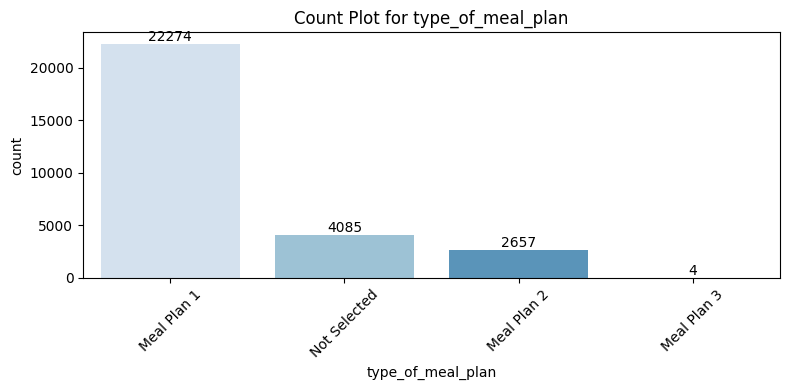

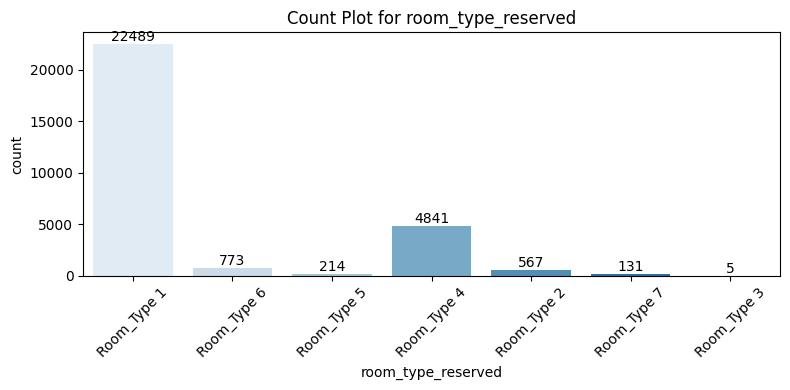

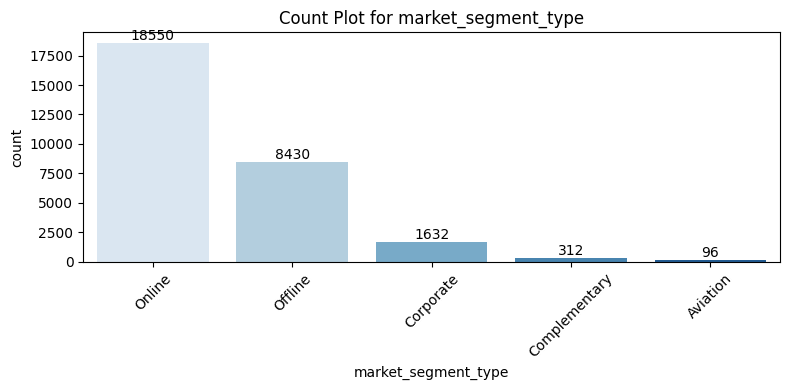

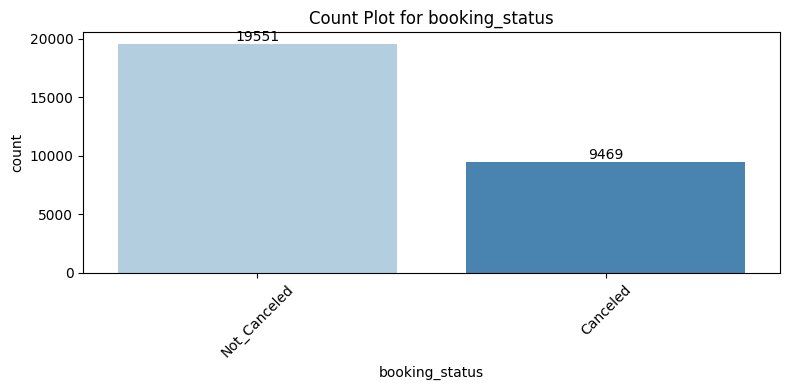

In [16]:
# Count plots for Categorical Columns

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, palette="Blues")
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

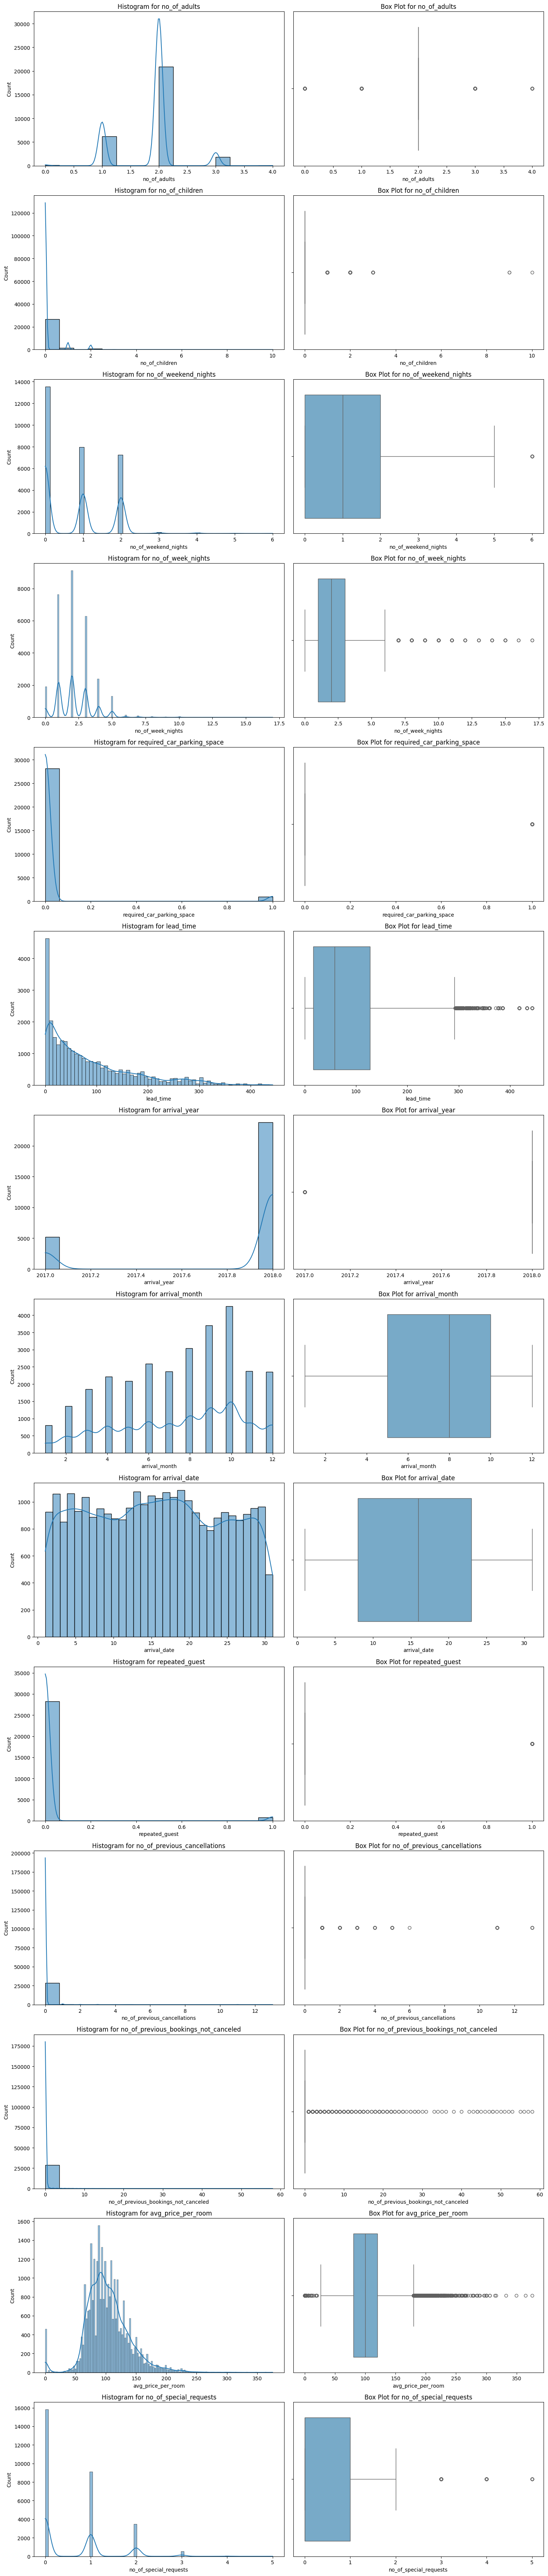

In [17]:
# Univariate Analysis

def num_plot_dist(df, numerical_columns):
    fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, len(numerical_columns)*5))
    if len(numerical_columns)==1:
        axes=[axes]
    
    for i, column in enumerate(numerical_columns):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette='Blues')
        axes[i][0].set_title(f"Histogram for {column}")
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

num_plot_dist(df, numerical_columns)

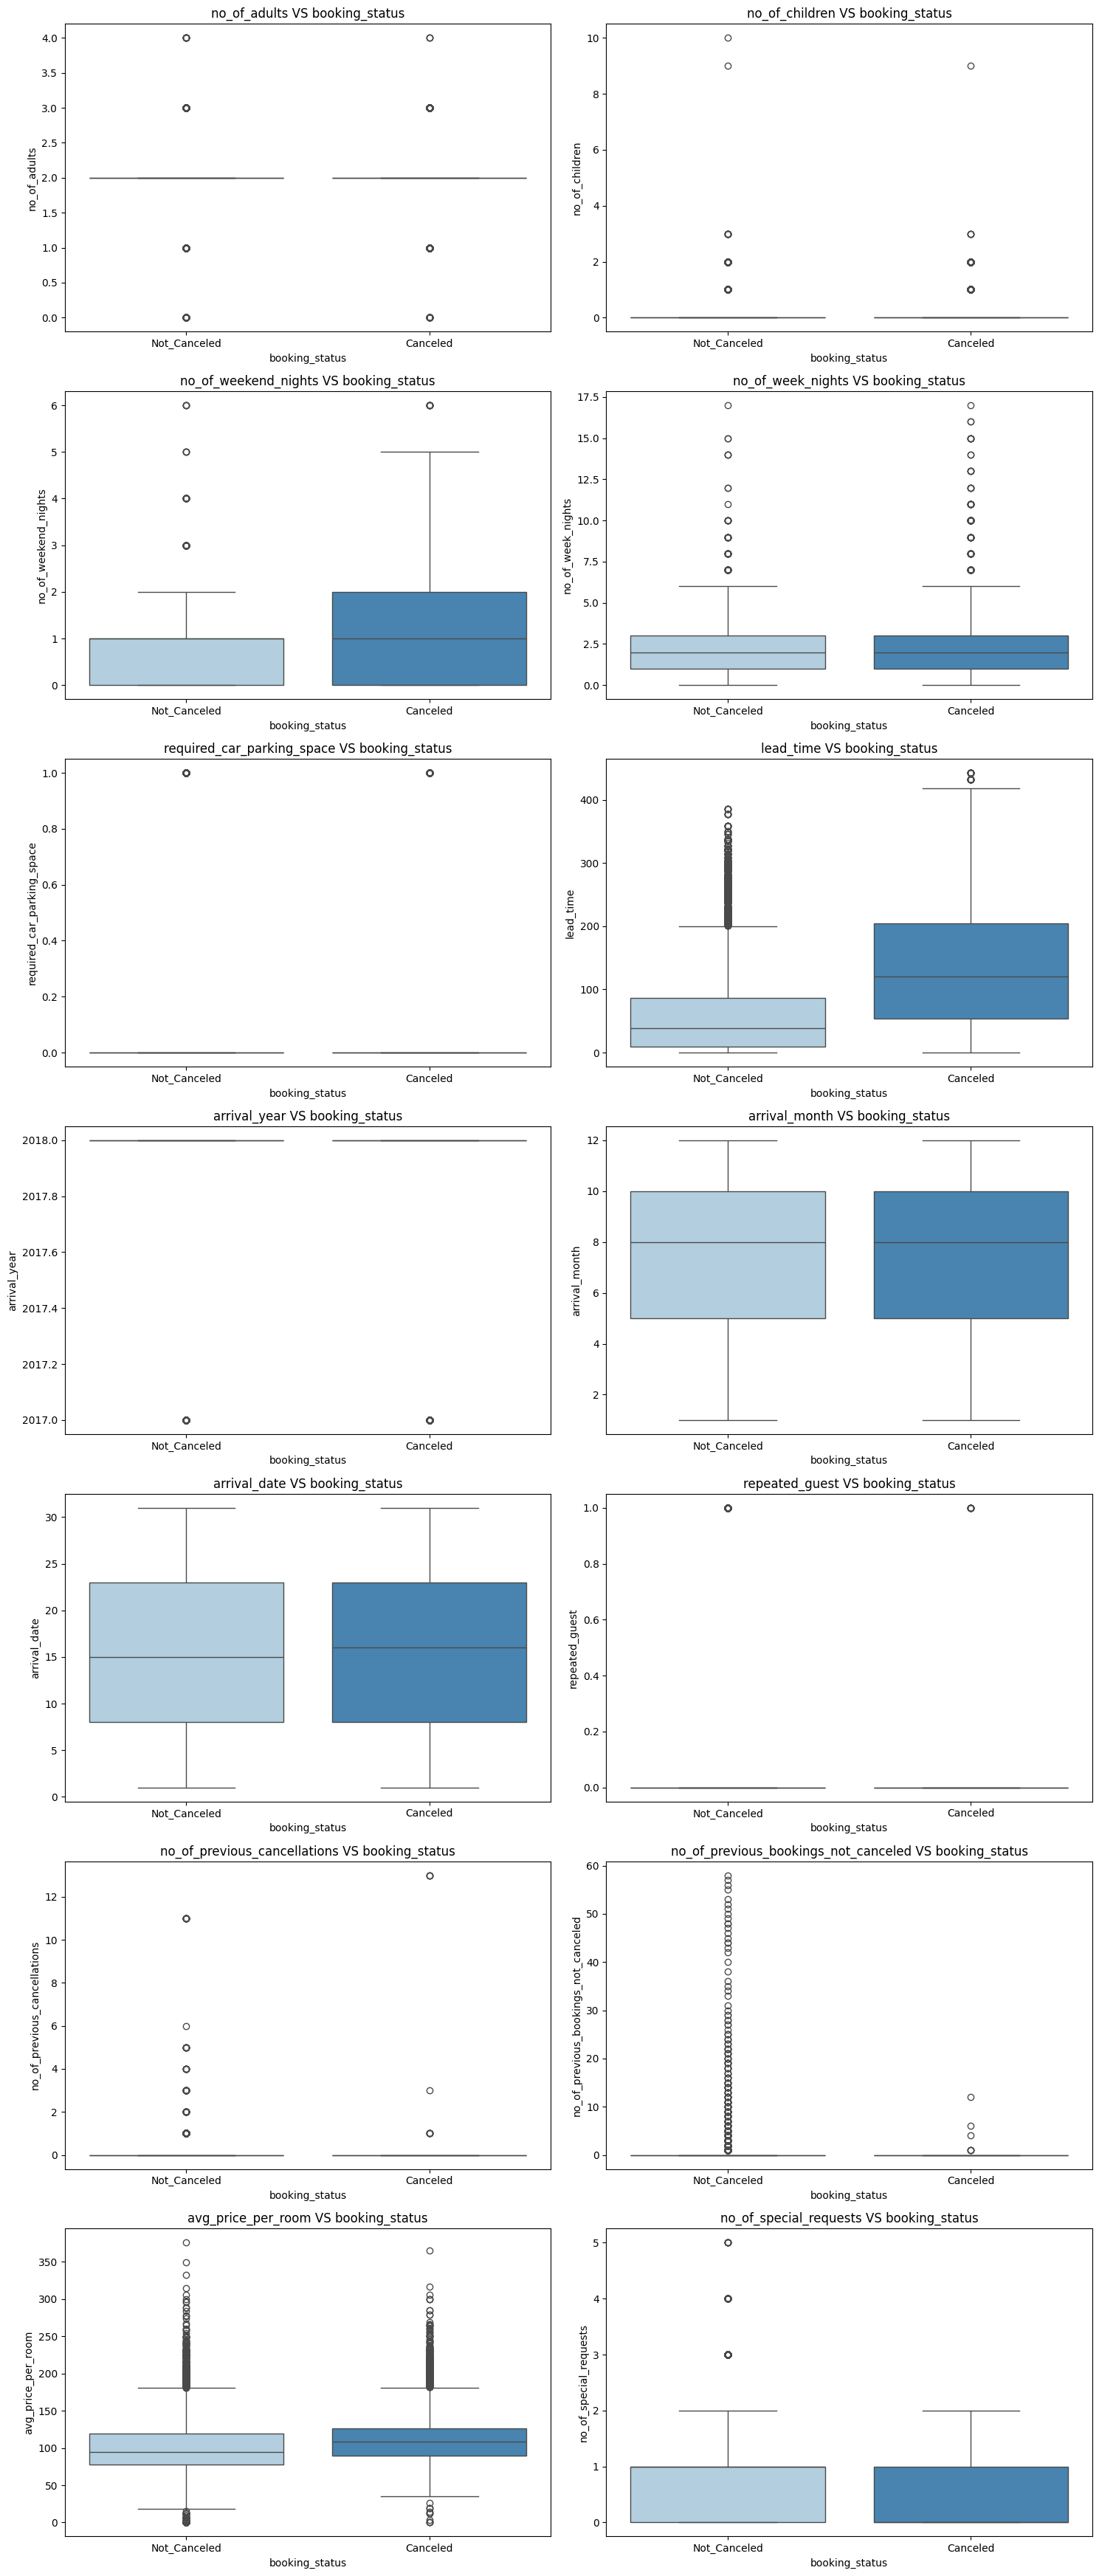

In [18]:
# Bivariate Analysis

def plot_bivariate_num(df, target, numerical_columns):
    num_plots = len(numerical_columns)
    num_rows  = (num_plots + 1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette='Blues')
        axes[i].set_title(f"{column} VS {target}")
    
    plt.tight_layout()
    plt.show()

plot_bivariate_num(df, 'booking_status', numerical_columns)

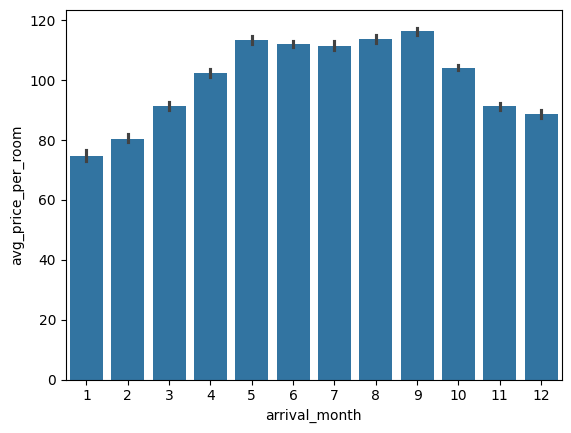

In [19]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=df)
plt.show()

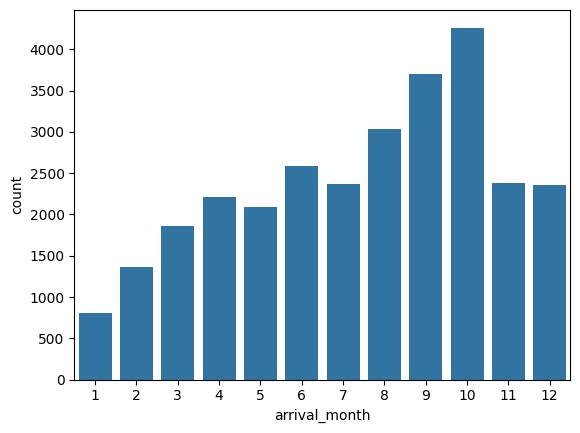

In [20]:
sns.countplot(x='arrival_month', data=df)
plt.show()

- It has been observed that hotels tend to increase their prices on days with high customer demand.

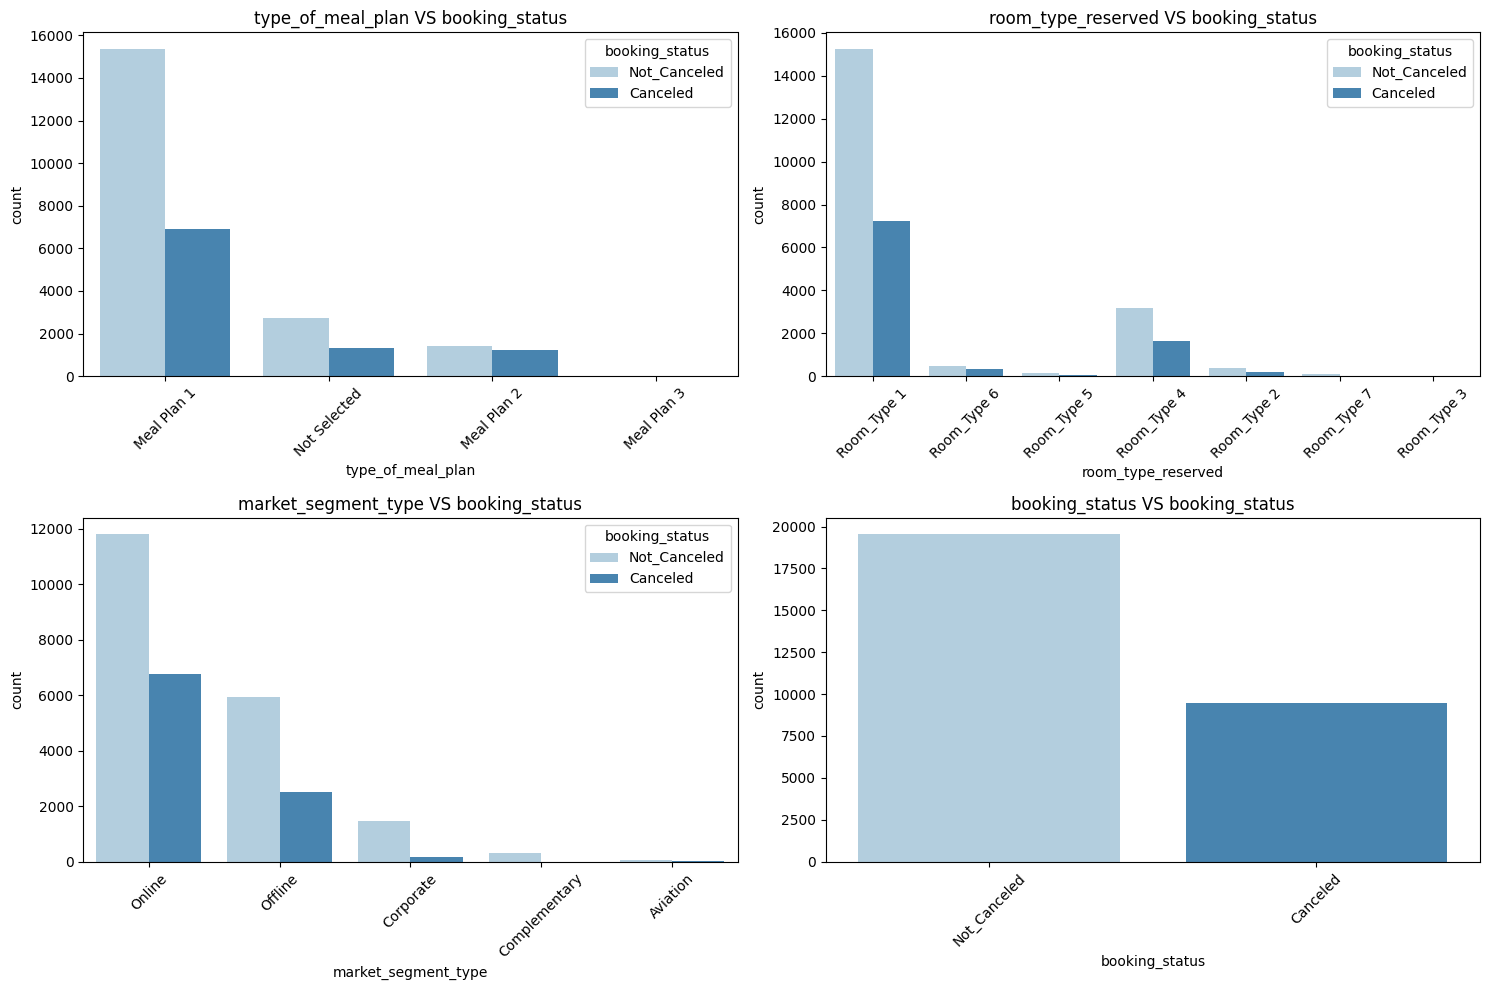

In [21]:
def plot_bivariate_cat(df, target, categorical_columns):
    num_plots = len(categorical_columns)
    num_rows  = (num_plots + 1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(categorical_columns):
        sns.countplot(x=column, hue=target, ax=axes[i], data=df, palette='Blues')
        axes[i].set_title(f"{column} VS {target}")
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_bivariate_cat(df, 'booking_status', categorical_columns)

### Data Preprocessing

In [22]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
25629,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
14473,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
23720,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
5843,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
18709,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [23]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

mappings = {}

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label, code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}


In [24]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29020 non-null  int64  
 1   no_of_children                        29020 non-null  int64  
 2   no_of_weekend_nights                  29020 non-null  int64  
 3   no_of_week_nights                     29020 non-null  int64  
 4   type_of_meal_plan                     29020 non-null  int64  
 5   required_car_parking_space            29020 non-null  int64  
 6   room_type_reserved                    29020 non-null  int64  
 7   lead_time                             29020 non-null  int64  
 8   arrival_year                          29020 non-null  int64  
 9   arrival_month                         29020 non-null  int64  
 10  arrival_date                          29020 non-null  int64  
 11  market_segment_t

In [26]:
# Skewness

skewness = df.skew()

skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            24.940984
no_of_previous_bookings_not_canceled    19.509733
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [27]:
# Many features are skewed, we will apply log transformation

for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [28]:
skewness_new = df.skew()

skewness_new

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            14.550045
no_of_previous_bookings_not_canceled     8.897196
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [29]:
# Handling Imbalanced Data

# 1 - Not Cancelled
# 0 - Cancelled

df['booking_status'].value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [30]:
# SMOTE

X = df.drop(columns='booking_status')
y = df['booking_status']

X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [31]:
# SMOTE

y.value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X,y)


In [33]:
y_res.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [34]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [35]:
data = balanced_df.copy()

In [36]:
data.shape

(39102, 18)

### Feature Selection

In [37]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='booking_status')
y = df['booking_status']

model = RandomForestClassifier(random_state=42)

model.fit(X,y)

RandomForestClassifier(random_state=42)

In [38]:
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

top_important_features_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [39]:
top_10_features = top_important_features_df['feature'].head(10).values

top_10_df = df[top_10_features.tolist() + ['booking_status']]

top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,no_of_adults,arrival_year,booking_status
25629,26,161.00,0,17,10,4,1,2,2,2017,1
14473,98,121.50,2,16,7,4,1,1,2,2018,1
23720,433,70.00,0,8,9,3,3,0,2,2018,0
5843,195,72.25,0,8,8,3,5,2,2,2018,1
18709,188,130.00,0,15,6,3,2,0,1,2018,0


In [40]:
top_10_df.shape

(29020, 11)

In [41]:
top_10_df.columns

Index(['lead_time', 'avg_price_per_room', 'no_of_special_requests',
       'arrival_date', 'arrival_month', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'no_of_adults',
       'arrival_year', 'booking_status'],
      dtype='object')

In [42]:
df = top_10_df.copy()

### Model Selection

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [44]:
X = df.drop(columns='booking_status')
y = df['booking_status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [45]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

[LightGBM] [Info] Number of positive: 15672, number of negative: 7544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 23216, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.675052 -> initscore=0.731123
[LightGBM] [Info] Start training from score 0.731123


In [46]:
metrics_df= pd.DataFrame(metrics)

metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.895762,0.906809,0.940706,0.923447
1,LogisticRegression,0.793246,0.812456,0.897912,0.853049
2,Gradient Boosting,0.851309,0.863373,0.923692,0.892515
3,Suuport vector classifier,0.766368,0.764521,0.939933,0.843201
4,Decsion Tree,0.862509,0.901905,0.891209,0.896525
5,KNN,0.806685,0.826581,0.899459,0.861481
6,Naive Bayes,0.777912,0.825213,0.847126,0.836026
7,XGboost,0.886113,0.898465,0.935293,0.916509
8,Adaboost,0.808408,0.836700,0.886311,0.860791
9,LGBM,0.882495,0.897538,0.930394,0.913671


In [47]:
### Train Random Forest Model

## Model Hypertuning

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df.drop(columns='booking_status')
y = df['booking_status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

rf = RandomForestClassifier(random_state=42)

params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf' : randint(1, 5),
    'bootstrap' : [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=10,
    cv = 5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.2s
[CV

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027E580DDC70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027E593D70B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027E593A5670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027E4F126900>},
                   random_state=42, scoring='accuracy', verbose=2)

In [48]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [49]:
best_rf_model = random_search.best_estimator_

In [50]:
y_pred = best_rf_model.predict(X_test)

In [51]:
accuracy      = accuracy_score(y_test, y_pred)
precision     = precision_score(y_test, y_pred)
recall        = recall_score(y_test, y_pred)
f1            = f1_score(y_test, y_pred)

# Printing all the Scores
print("accuracy : ", accuracy, "\n")
print("precision : ", precision, "\n")
print("recall : ", recall, "\n")
print("f1 : ", f1, "\n")

accuracy :  0.896106133700896 

precision :  0.9074626865671642 

recall :  0.9404485692188709 

f1 :  0.9236612229396126 

